# Proje 1: Görüntü Sınıflandırma (Transfer Learning - VGG16)

**Adı:** İbrahim 
**Soyadı:** KARAKUZU
**Okul Numarası:** 2112721018
**GitHub Repo Bağlantısı:** [Linkiniz]

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import os

# GPU Kontrolü
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU Algılandı: {gpus[0].name}")
    print("Model eğitiminde GPU kullanılacak.")
else:
    print("⚠️ GPU Bulunamadı! CPU kullanılacak (Eğitim yavaş olabilir).")

# Sabit Değerler
DATASET_PATH = 'dataset'  # Klasör adı
IMG_SIZE = (128, 128)     # Resim boyutu
BATCH_SIZE = 32           # Her adımda işlenecek resim sayısı
EPOCHS = 10               # Eğitim tekrar sayısı

⚠️ GPU Bulunamadı! CPU kullanılacak (Eğitim yavaş olabilir).


In [2]:
# Veri Artırma ve Ön İşleme
# Transfer learning'de genelde sadece rescale (0-1 arasına çekme) yeterlidir.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # %20 Test verisi ayırıyoruz
)

# Eğitim Verisi
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Test/Doğrulama Verisi
validation_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Sınıfları Göster
class_names = list(train_generator.class_indices.keys())
print(f"Tespit edilen sınıflar: {class_names}")
num_classes = len(class_names)

Found 178 images belonging to 2 classes.
Found 43 images belonging to 2 classes.
Tespit edilen sınıflar: ['100_tl', '50_tl']


In [3]:
# VGG16'yı ImageNet ağırlıklarıyla indir (En üst katmanı hariç tut)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Mevcut ağırlıkları dondur (Eğitilmiş bilgileri koru)
base_model.trainable = False

# Kendi sınıflandırma katmanlarımızı ekleyelim
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), # Ezberlemeyi önlemek için (Dropout)
    layers.Dense(num_classes, activation='softmax') # Çıkış katmanı
])

# Modeli Derle
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,610 (64.14 MB)

 Trainable params: 2,097,922 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
print("Eğitim başlıyor...")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

print("Eğitim tamamlandı.")

Eğitim başlıyor...
Epoch 1/10


c:\Users\karakuzuibrahim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 600ms/step - accuracy: 0.6938 - loss: 0.6164 - val_accuracy: 0.9375 - val_loss: 0.2542
Epoch 2/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.9444 - loss: 0.2735

c:\Users\karakuzuibrahim\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9444 - loss: 0.2735 - val_accuracy: 1.0000 - val_loss: 0.2330
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 0.9315 - loss: 0.2317 - val_accuracy: 0.9688 - val_loss: 0.2100
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9688 - loss: 0.1192 - val_accuracy: 0.9688 - val_loss: 0.1865
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 560ms/step - accuracy: 0.9795 - loss: 0.0866 - val_accuracy: 1.0000 - val_loss: 0.0930
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 1.0000 - loss: 0.0422 - val_accuracy: 1.0000 - val_loss: 0.0824
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step - accuracy: 0.9932 - loss: 0.0478 - val_accuracy: 1.0000 - val_loss: 0.0559
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 1.0000 - loss: 0.0528 - val_accuracy: 1.0000 - val_loss: 0.0529
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 527ms/step - accuracy: 0.9932 - loss: 0.0416 - val_accuracy: 1.0000 - val_loss: 0.0465
Epo

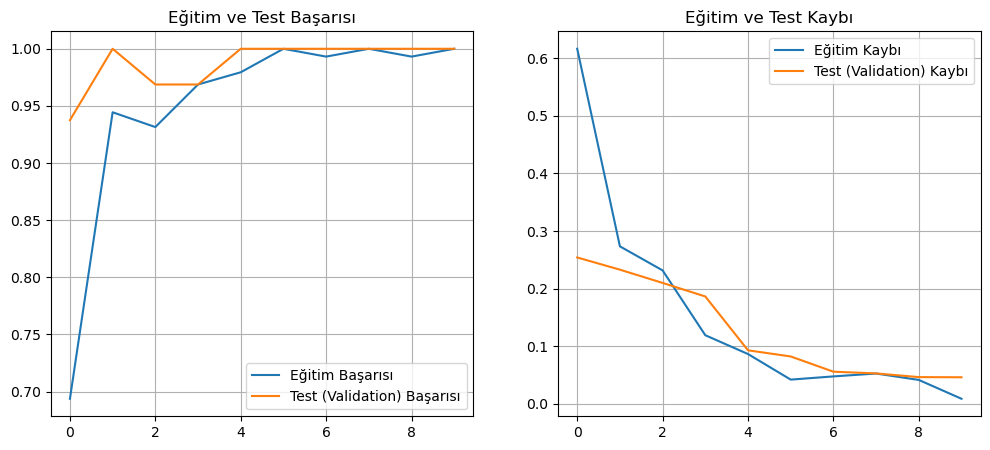

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 1.0000 - loss: 0.0450

 Model1 (Transfer Learning) Test Doğruluğu: %100.00


In [5]:
# Grafikleri Çizdirme Fonksiyonu
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    
    # Doğruluk Grafiği
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Eğitim Başarısı')
    plt.plot(epochs_range, val_acc, label='Test (Validation) Başarısı')
    plt.legend(loc='lower right')
    plt.title('Eğitim ve Test Başarısı')
    plt.grid(True)

    # Kayıp Grafiği
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Eğitim Kaybı')
    plt.plot(epochs_range, val_loss, label='Test (Validation) Kaybı')
    plt.legend(loc='upper right')
    plt.title('Eğitim ve Test Kaybı')
    plt.grid(True)
    
    plt.show()

plot_results(history)

# Final Test Doğruluğu
loss, accuracy = model.evaluate(validation_generator)
print(f"\n Model1 (Transfer Learning) Test Doğruluğu: %{accuracy * 100:.2f}")